In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering

In [2]:
## Loading Datasets

customers_data = pd.read_csv("Customers.csv")
products_data = pd.read_csv("Products.csv")
transactions_data = pd.read_csv("Transactions.csv")

1. Customer.csv

In [3]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
# For customers data, changing to the datetime format
customers_data["SignupDate"]=pd.to_datetime(customers_data["SignupDate"])

In [5]:
# Checking for Unhandled Missing Data
customers_data[customers_data["CustomerID"]=="NaN"]
customers_data[customers_data["CustomerName"]=="NaN"]
customers_data[customers_data["Region"]=="NaN"]
customers_data[customers_data["SignupDate"]=="NaN"]

,CustomerID,CustomerName,Region,SignupDate


2. products_data

In [6]:
products_data.info()
products_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
# Checking for Unhandled Missing Data
products_data[products_data["ProductName"]=="NaN"]
products_data[products_data["Category"]=="NaN"]
products_data[products_data["Price"]=="NaN"]
products_data[products_data["ProductID"]=="NaN"]

,ProductID,ProductName,Category,Price


In [8]:
# For customers data
customers_data["SignupDate"]=pd.to_datetime(customers_data["SignupDate"])

3. transactions_data

In [9]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [10]:
transactions_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [11]:
# For customers data, changing to the datetime format
transactions_data["TransactionDate"]=pd.to_datetime(transactions_data["TransactionDate"])

In [12]:
# Checking for Unhandled Missing Data
transactions_data[transactions_data["CustomerID"]=="NaN"]
transactions_data[transactions_data["TransactionID"]=="NaN"]
transactions_data[transactions_data["ProductID"]=="NaN"]
transactions_data[transactions_data["TransactionDate"]=="NaN"]
transactions_data[transactions_data["Quantity"]=="NaN"]
transactions_data[transactions_data["TotalValue"]=="NaN"]
transactions_data[transactions_data["Price"]=="NaN"]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [13]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [14]:
print("Duplicated Values in customers_data : ",customers_data.duplicated().value_counts(),"\n")
print("Duplicated Values in products_data : ",products_data.duplicated().value_counts(),"\n")
print("Duplicated Values in transactions_data : ",transactions_data.duplicated().value_counts(),"\n")

Duplicated Values in customers_data :  False    200
Name: count, dtype: int64 

Duplicated Values in products_data :  False    100
Name: count, dtype: int64 

Duplicated Values in transactions_data :  False    1000
Name: count, dtype: int64 



Takeaways:
- Checked for datatype correctness and found issue in products_data and transactions_data
- Therefore, Changed the date and time columns to datetime datatype
- Found no Null values
- Found no Duplicate Values

# Exploratory Data Analysis (EDA)

In [15]:
print(customers_data.shape,
products_data.shape,
transactions_data.shape)

(200, 4) (100, 4) (1000, 7)


In [16]:
# Merging datasets for more comprehensive Analysis
merged_datasets = transactions_data.merge(customers_data,on="CustomerID",how="left")\
    .merge(products_data,on="ProductID",how="left")
df = merged_datasets.copy()
df.drop("Price_y",axis=1,inplace=True)
df.rename(columns={"Price_x":"Price"},inplace=True)

In [17]:
merged_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [18]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


### Customer Metrics

In [19]:
# Total sale
Total_sale = np.round(df["TotalValue"].sum(),3)
print(f"Total Sales Generated: {Total_sale}\n")
# Average Transaction Values
avg_transaction_amount = np.round(df["TotalValue"].mean(),3)
print(f"Average Transaction Amount: {avg_transaction_amount}\n")
# Most Active Customers
active_customers = df.groupby("CustomerID")["TransactionID"].count().sort_values(ascending=False).head(5)
print(f"Most Active Customers:\n{active_customers} \n")
# Customer Retention
# df.groupby("CustomerID")["SignupDate"].count().sort_values(ascending=False)
customer_retention= df.groupby(df["SignupDate"].dt.year)["CustomerID"].count().sort_values(ascending=False)
print(f"Customer retention by Year:\n{customer_retention} \n")
# Top 5 customers by Lifetime
Customer_by_lifetime = df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)
print(f"Top 5 customers by lifetime with maximum spends till date: \n{Customer_by_lifetime} \n")


Total Sales Generated: 689995.56

Average Transaction Amount: 689.996

Most Active Customers:
CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
Name: TransactionID, dtype: int64 

Customer retention by Year:
SignupDate
2024    387
2022    332
2023    281
Name: CustomerID, dtype: int64 

Top 5 customers by lifetime with maximum spends till date: 
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64 



### Price Metrics

In [20]:
# Revenue Generated by each category
rev_gen_each_cat = df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print(f"Revenue generated by each category:\n{rev_gen_each_cat} \n")
# Most Selling product
top_5_products = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print(f"Most Selling Products:\n{top_5_products} \n")
# Price range of Products sold
price_stats = df["Price"].agg(["min","max","mean"])
print(f"Price Range of Products Sold:\n{price_stats} \n")

Revenue generated by each category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64 

Most Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64 

Price Range of Products Sold:
min      16.08000
max     497.76000
mean    272.55407
Name: Price, dtype: float64 



### Time& Reason based Transaction Metrics

In [21]:
#Sales by Day of week
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()
Sales_DOW=df.groupby("DayOfWeek")["TotalValue"].sum().sort_values(ascending=False)

#Monthly Trends in Sale
df['Monthly'] = df['TransactionDate'].dt.month_name()
Sales_Month=df.groupby("Monthly")["TotalValue"].sum().sort_values(ascending=False)
print(f"Monthly Sales Trends:\n{Sales_Month} \n")
print(f"Sales by Day of week:\n{Sales_DOW} \n")

# Total Sales by Region
tot_sales_region = df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print(f"Total Sales by Region\n{tot_sales_region} \n")

# Total Orders by Region
tot_orders_region=df.groupby("Region")["TransactionID"].count().sort_values(ascending=False)
print(f"Total Orders by Region\n{tot_orders_region} \n")


Monthly Sales Trends:
Monthly
July         71366.39
September    70603.75
January      66376.39
May          64527.74
August       63436.74
December     62818.72
April        57519.06
February     51459.27
June         48771.18
March        47828.73
October      47063.22
November     38224.37
Name: TotalValue, dtype: float64 

Sales by Day of week:
DayOfWeek
Wednesday    119203.15
Tuesday      108567.61
Monday       101984.33
Thursday      99202.71
Sunday        92605.93
Friday        87032.09
Saturday      81399.74
Name: TotalValue, dtype: float64 

Total Sales by Region
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64 

Total Orders by Region
Region
South America    304
North America    244
Europe           234
Asia             218
Name: TransactionID, dtype: int64 



# Visualization

### Customer Metrics

In [22]:
# Total sale
Total_sale = np.round(df["TotalValue"].sum(),3)
print(f"Total Sales Generated: {Total_sale}\n")
# Average Transaction Values
avg_transaction_amount = np.round(df["TotalValue"].mean(),3)
print(f"Average Transaction Amount: {avg_transaction_amount}\n")
# Most Active Customers
active_customers = df.groupby("CustomerID")["TransactionID"].count().sort_values(ascending=False).head(5)
print(f"Most Active Customers:\n{active_customers} \n")
# Customer Retention
# df.groupby("CustomerID")["SignupDate"].count().sort_values(ascending=False)
customer_retention= df.groupby(df["SignupDate"].dt.year)["CustomerID"].count().sort_values(ascending=False)
print(f"Customer retention by Year:\n{customer_retention} \n")
# Top 5 customers by Lifetime
Customer_by_lifetime = df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)
print(f"Top 5 customers by lifetime with maximum spends till date: \n{tot_orders_region} \n")


Total Sales Generated: 689995.56

Average Transaction Amount: 689.996

Most Active Customers:
CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
Name: TransactionID, dtype: int64 

Customer retention by Year:
SignupDate
2024    387
2022    332
2023    281
Name: CustomerID, dtype: int64 

Top 5 customers by lifetime with maximum spends till date: 
Region
South America    304
North America    244
Europe           234
Asia             218
Name: TransactionID, dtype: int64 



<Axes: title={'center': 'Top 5 customers by Lifetime'}, xlabel='CustomerID'>

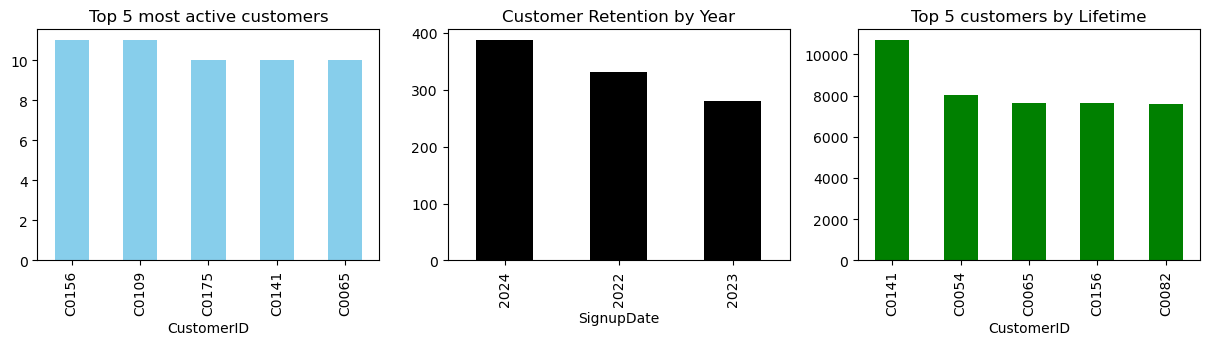

In [23]:

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
active_customers.plot(kind="bar",color="skyblue",title="Top 5 most active customers")
plt.subplot(1,3,2)
customer_retention.plot(kind="bar",color="black",title="Customer Retention by Year")
plt.subplot(1,3,3)
Customer_by_lifetime.plot(kind="bar",color="green",title="Top 5 customers by Lifetime")




In [24]:
df.head(2)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,DayOfWeek,Monthly
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,Sunday,August
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,Monday,May


In [25]:
Customer_by_lifetime = df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)

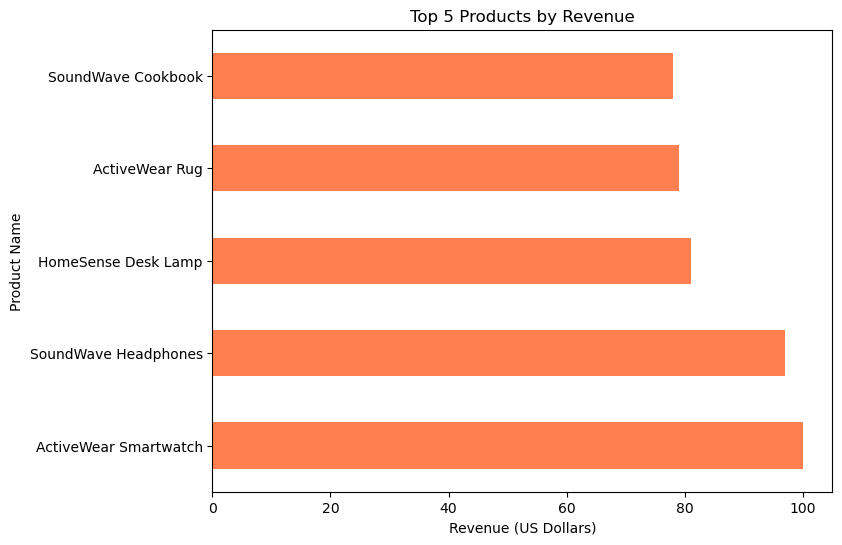

In [26]:
# Top 5 products by revenue 

top_5_products.plot(kind='barh', figsize=(8, 6), color='coral', title='Top 5 Products by Revenue')
plt.xlabel('Revenue (US Dollars)')
plt.ylabel('Product Name')
plt.show()

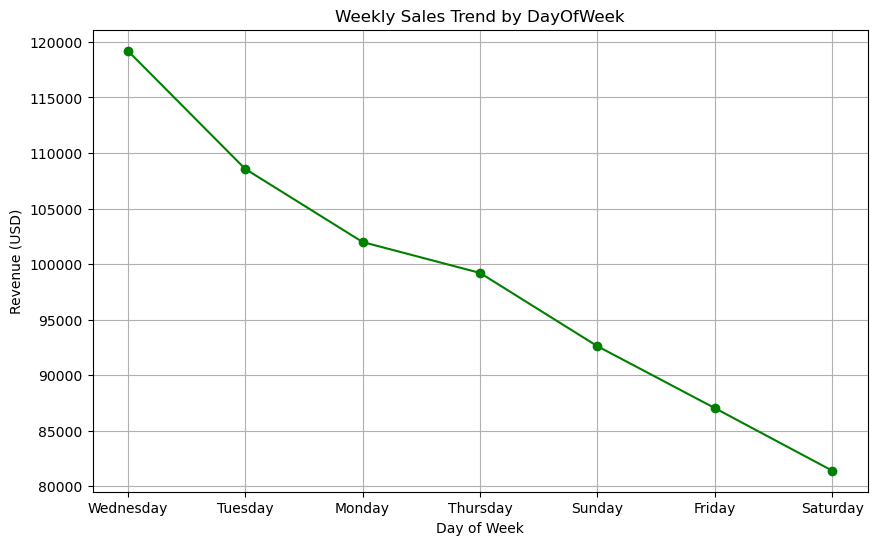

In [27]:
# Sales by Day
Sales_DOW.plot(kind='line', figsize=(10, 6), marker='o', title='Weekly Sales Trend by DayOfWeek', color='green')
plt.ylabel('Revenue (USD)')
plt.xlabel('Day of Week')
plt.grid()
plt.show()


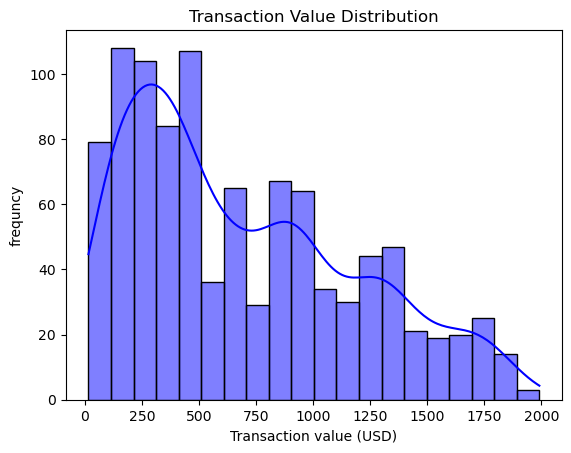

In [28]:
# Transaction Value Distribution
sns.histplot(df['TotalValue'], kde=True, bins=20, color='blue')
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction value (USD)')
plt.ylabel('frequncy')
plt.show()


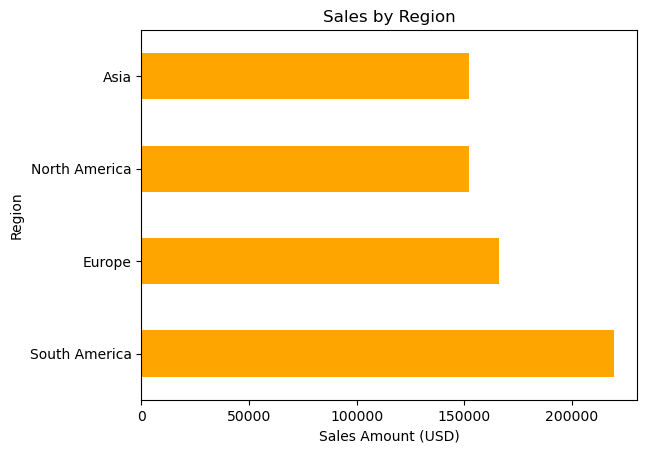

In [29]:

tot_sales_region.plot(kind='barh', color='orange', title='Sales by Region')
plt.xlabel('Sales Amount (USD)')
plt.ylabel('Region')
plt.show()



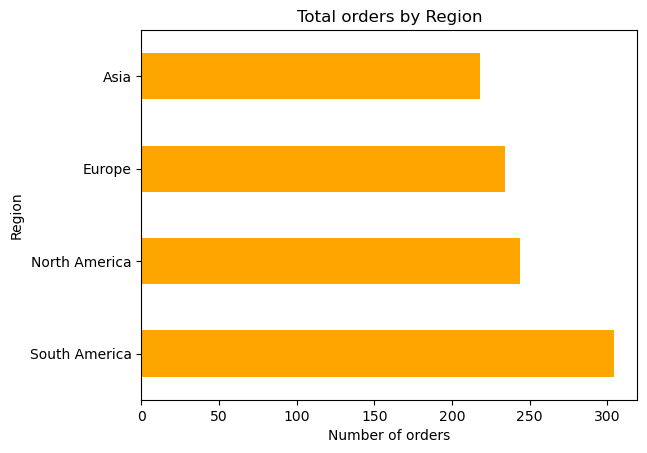

In [30]:
tot_orders_region.plot(kind='barh', color='orange', title='Total orders by Region')
plt.xlabel('Number of orders')
plt.ylabel('Region')
plt.subplots_adjust(hspace=2)
plt.show()

### Regional Metrics

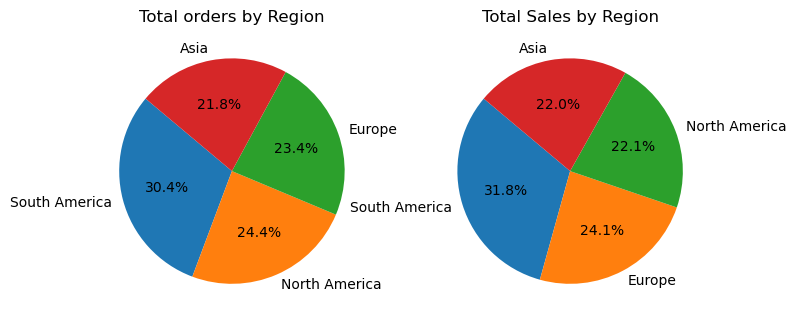

In [31]:
# Regional Metrics
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
tot_orders_region.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, title='Total orders by Region')
plt.ylabel('')
plt.subplot(1,2,2)
tot_sales_region.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, title='Total Sales by Region')
plt.ylabel('')
plt.show()

<Axes: ylabel='Count'>

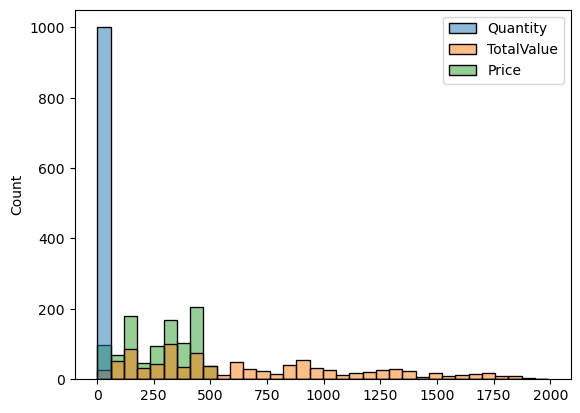

In [32]:
sns.histplot(df)

In [33]:
rev_gen_each_cat = df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print(f"Revenue generated by each category:\n{rev_gen_each_cat} \n")

Revenue generated by each category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64 



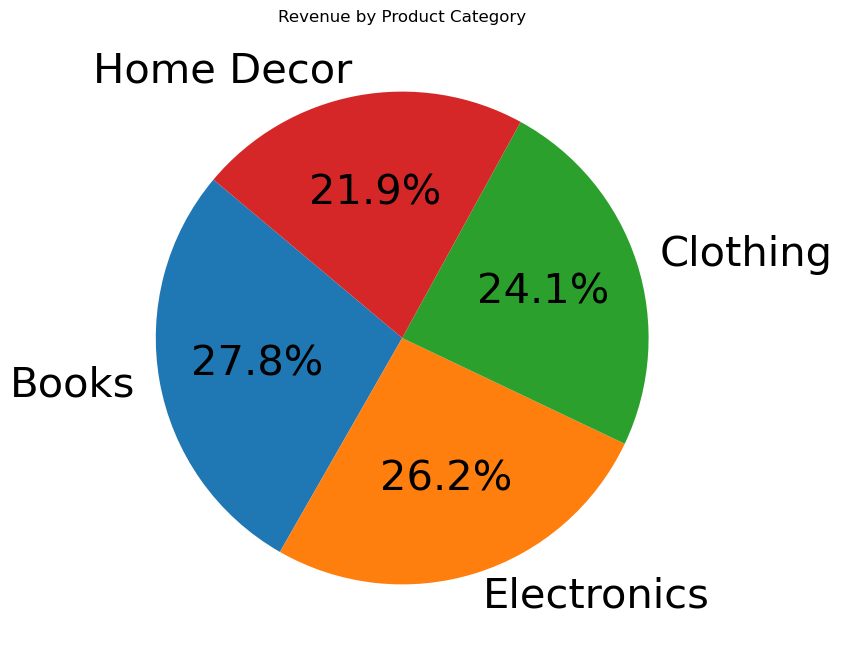

In [34]:
plt.figure(figsize=(5,2))
rev_gen_each_cat.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, title='Revenue by Product Category',fontsize=30)
plt.ylabel('')
plt.show()

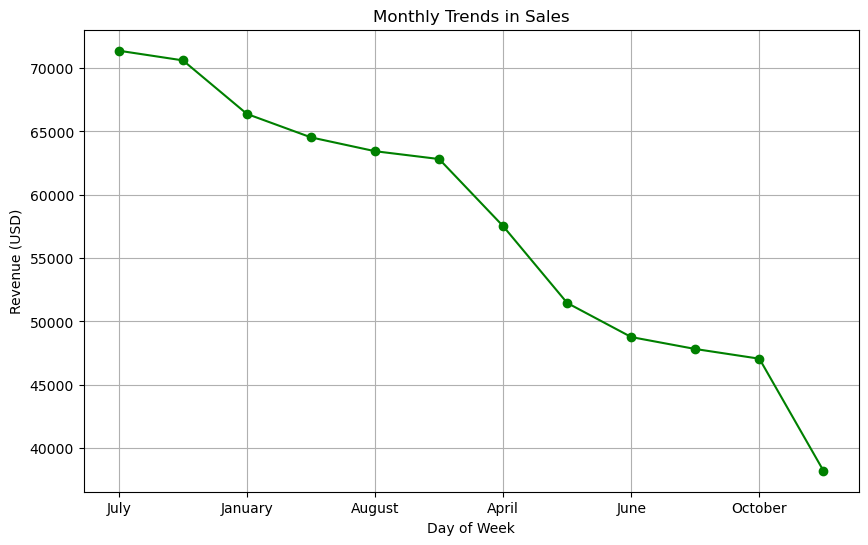

In [35]:
# Monthly Trends
Sales_Month.plot(kind='line', figsize=(10, 6), marker='o', title='Monthly Trends in Sales', color='green')
plt.ylabel('Revenue (USD)')
plt.xlabel('Day of Week')
plt.grid()
plt.show()

In [39]:
df.to_csv("Resources/Merged_dataset.csv",index=False)